In [255]:
# Dependencies and Setup
#%matplotlib inline
#%pylab inline

import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import pandas as pd
import numpy as np
import pdftables_api
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import link, FloatSlider
from branca.colormap import linear


In [322]:
# File to Load
file1_to_load = "miami-dade-county_single-family-homes_2012-2019_summary.csv"
file2_to_load = "International_Buyers_US.csv"
file3_to_load = "Foreign_Buyers_in_County.csv"
file4_to_load = "Overall_Tax_Burden_by_State.csv"
file5_to_load = "NewMonthlyListings_SSA_AllHomes_City.csv"
# Read Purchasing File and store into Pandas data frame
miami_single_family_data = pd.read_csv(file1_to_load)
international_buyers_data = pd.read_csv(file2_to_load)
international_buyers_county_data = pd.read_csv(file3_to_load)
overall_tax_burden_state = pd.read_csv(file4_to_load)
monthly_listing_miami_city = pd.read_csv(file5_to_load)

# Transpose data frame
miami_single_family_data_f = miami_single_family_data.T
# Removing index header
header = miami_single_family_data_f.iloc[0]
miami_single_family_data_f = miami_single_family_data_f[1:]
miami_single_family_data_f.columns = header

# Print to terminal the first 5 rows to make sure file was read correctly
miami_single_family_data_f



Metrics,Closed Sales,Cash Sales,Mortgage Sales,Cash Sales Dollar Volume,Percent of Closed Sales Paid in Cash,New Pending Sales,New Listings,Median Sale Price,Average Sale Price,Median Days on Market,Avg. Percent of Original List Price Received,Inventory of Homes for Sale,Months Supply of Inventory
2018,12931,3008,9923,1.60955e+09,23.3,15376,21232,350000,535091,46,0.956,6872,6.4
2017,12775,3203,9572,1.56924e+09,25.1,15846,19790,326000,489929,48,0.953,5969,5.6
2016,13164,4024,9140,1.84703e+09,30.6,16699,20745,295000,459004,50,0.956,6218,5.7
2015,13936,5066,8870,2.25957e+09,36.4,19125,24455,265000,446026,43,0.952,6045,5.2
2014,13521,5856,7665,2.52878e+09,43.3,19550,24592,245000,431827,45,0.95,6265,5.6
2013,12901,5881,7020,2.35586e+09,45.6,20284,23235,225000,400589,41,0.956,5986,5.6
2012,11463,5210,6253,1.90544e+09,45.5,19732,20201,188000,365728,44,0.931,5000,5.2


In [243]:
# Print to terminal the first 5 rows to make sure file was read correctly
international_buyers_data


,YEAR,FL,CA,TX,AZ,NJ,NC,IL,NY,GA
0,2012,26,11,7,7,1,2,3,4,4
1,2013,23,17,9,9,2,1,2,3,2
2,2014,23,14,12,6,3,2,3,3,2
3,2015,21,16,8,5,3,2,3,3,2
4,2016,22,15,10,4,4,3,4,4,2
5,2017,22,12,12,4,4,3,3,3,3
6,2018,19,14,9,5,4,3,3,5,4


In [245]:
# Print to terminal the first 5 rows to make sure file was read correctly
international_buyers_county_data


,Year,Miami-Dade County,Broward County,Palm Beach,Martin County,Other Counties
0,2015,0.691,0.247,0.038,0.0043,0.0183
1,2016,0.659,0.268,0.037,0.0051,0.0300
2,2017,0.634,0.248,0.037,0.0000,0.0752
3,2018,0.646,0.312,0.039,0.0003,0.0043


In [320]:
# Converting string to float for total tax burden values
overall_tax_burden_state['Total Tax Burden'] = overall_tax_burden_state['Total Tax Burden'].astype(float)*100
# Print to terminal the first 5 rows to make sure file was read correctly
overall_tax_burden_state.head()

,Overall Rank,State,Total Tax Burden
0,1,New York,12.97
1,2,Hawaii,11.71
2,3,Maine,10.84
3,4,Vermont,10.77
4,5,Minnesota,10.25


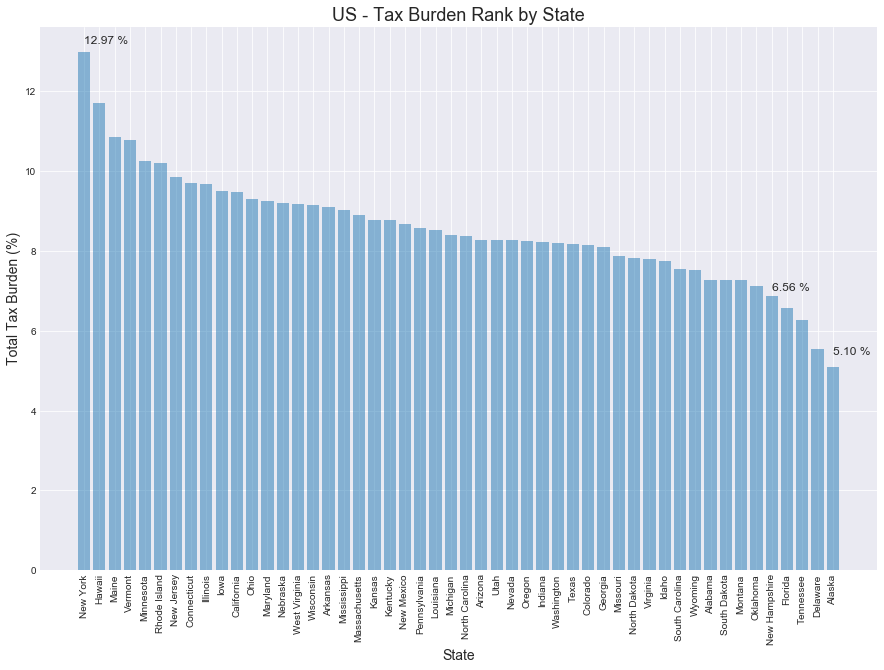

In [293]:
# Create Plot
fig, ax = plt.subplots(figsize=(15, 10))
y_pos = np.arange(len(overall_tax_burden_state['Total Tax Burden']))
ax.bar(y_pos, overall_tax_burden_state['Total Tax Burden'], align='center', alpha=0.5)
plt.xticks(y_pos, overall_tax_burden_state['State'], rotation=90)
ax.set_title("US - Tax Burden Rank by State", fontsize=18)
ax.set_ylabel("Total Tax Burden (%)", fontsize=14)
ax.set_xlabel("State", fontsize=14)

x=45
y=7
i=0
j=13.2
k=49
l=5.4
ax.annotate('6.56 %',xy=(x,y), size='large')
ax.annotate('12.97 %',xy=(i,j), size='large')
ax.annotate('5.10 %',xy=(k,l), size='large')
plt.show()

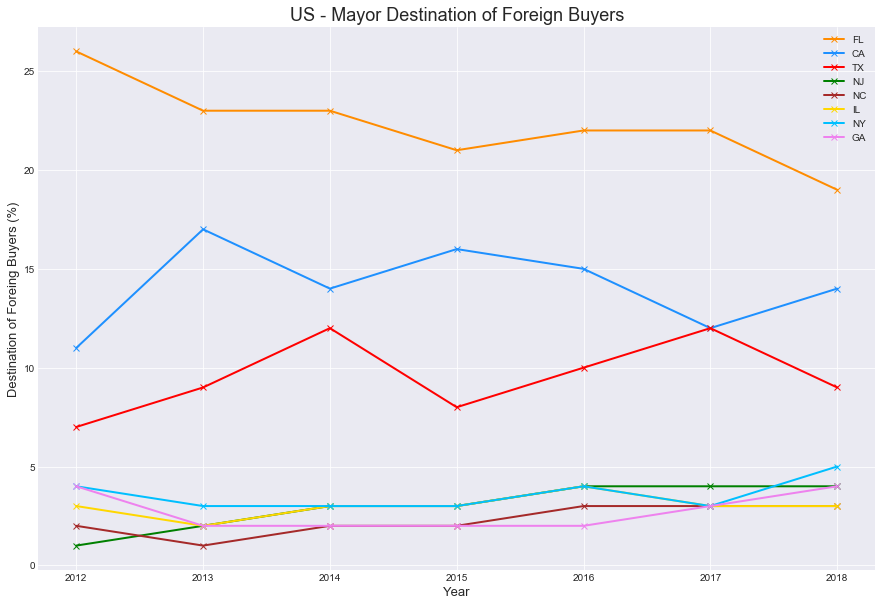

In [295]:
# plot style
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,10))
plt.plot( 'YEAR', 'FL', data=international_buyers_data, marker='x', color='darkorange', linewidth=2)
plt.plot( 'YEAR', 'CA', data=international_buyers_data, marker='x', color='dodgerblue', linewidth=2)
plt.plot( 'YEAR', 'TX', data=international_buyers_data, marker='x', color='red', linewidth=2)
plt.plot( 'YEAR', 'NJ', data=international_buyers_data, marker='x', color='green', linewidth=2)
plt.plot( 'YEAR', 'NC', data=international_buyers_data, marker='x', color='brown', linewidth=2)
plt.plot( 'YEAR', 'IL', data=international_buyers_data, marker='x', color='gold', linewidth=2)
plt.plot( 'YEAR', 'NY', data=international_buyers_data, marker='x', color='deepskyblue', linewidth=2)
plt.plot( 'YEAR', 'GA', data=international_buyers_data, marker='x', color='violet', linewidth=2)

plt.legend()
plt.title("US - Mayor Destination of Foreign Buyers", fontsize = 18)
plt.ylabel("Destination of Foreing Buyers (%)", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.grid(True)

# Save the Figure
plt.savefig("US_Mayor_Destination_Foreign_Buyers.png")


In [323]:
# Create plot using plotly library
years=['2018', '2017', '2016', '2015']

fig = go.Figure(data=[
    go.Bar(name='Miami', x=years, y=international_buyers_county_data['Miami-Dade County']*100),
    go.Bar(name='Broward', x=years, y=international_buyers_county_data['Broward County']*100),
    go.Bar(name='Palm Beach', x=years, y=international_buyers_county_data['Palm Beach']*100),
    go.Bar(name='Martin', x=years, y=international_buyers_county_data['Martin County']*100),
    go.Bar(name='Other Counties', x=years, y=international_buyers_county_data['Other Counties']*100),   
])
# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(
    title="Miami Dade - Destination of Foreign Buyers",
    xaxis_title="Years",
    yaxis_title="D - Foreign Buyers (%)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

In [321]:
# Create plot using plotly library
years=['2018', '2017', '2016', '2015', '2014', '2013', '2012']

fig = go.Figure(data=[
    go.Bar(name='Closed Sales', x=years, y=miami_single_family_data_f['Closed Sales']),
    go.Bar(name='Mortgage Sales', x=years, y=miami_single_family_data_f['Mortgage Sales']),
    go.Bar(name='Percent of Closed Sales Paid in Cash', x=years, y=miami_single_family_data_f['Percent of Closed Sales Paid in Cash']*10),
    go.Bar(name='Cash Sales', x=years, y=miami_single_family_data_f['Cash Sales'])
])
# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(
    title="Miami Dade - Single Family - Cash Sales",
    xaxis_title="Years",
    yaxis_title="Sales",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)
fig.show()

In [319]:
# Create plot using plotly library
years=['2018', '2017', '2016', '2015', '2014', '2013', '2012']

fig = go.Figure(data=[
  
    go.Bar(name='Average Sale Price', x=years, y=miami_single_family_data_f['Average Sale Price']/10),
    go.Bar(name='Cash Sales', x=years, y=miami_single_family_data_f['Cash Sales']),
    go.Bar(name='New Listing Inventory', x=years, y=monthly_listing_miami_city['New Listing Inventory'])
])
# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(
    title="Miami - Cash Sales VS. Average Sales",
    xaxis_title="Years",
    yaxis_title="Sales (K*10)",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()

In [309]:
monthly_listing_miami_city


,Year,RegionName,RegionType,StateName,New Listing Inventory
0,2013,Miami,City,FL,12192
1,2014,Miami,City,FL,10688
2,2015,Miami,City,FL,10256
3,2016,Miami,City,FL,9627
4,2017,Miami,City,FL,8172
5,2018,Miami,City,FL,9268


In [312]:
# Create plot using plotly library
years=['2013', '2014', '2015', '2016', '2017', '2018']

fig = go.Figure(data=[
    go.Bar(name='New Listing Inventory', x=years, y=monthly_listing_miami_city['New Listing Inventory'])
])
# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(
    title="Miami - Cash Sales VS. Average Sales",
    xaxis_title="Years",
    yaxis_title="New Listing Inventory",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)

fig.show()